In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import h5py

from mpl_toolkits.mplot3d import axes3d
%matplotlib widget

In [2]:
Nc=4
Nf=1

In [3]:
Ns=32
Nt=8

In [4]:
gstar_HSDM = 2*(Nc**2-1)+2*Nf**2
gstar_SM = 106.75
gstar = gstar_SM + gstar_HSDM

In [5]:
MP_GeV = 1.220890 * 10**19 # GeV https://physics.nist.gov/cgi-bin/cuu/Value?plkmc2gev

In [6]:
betas_02 = np.loadtxt("data/betas_mass0p2000.dat")
betas_03 = np.loadtxt("data/betas_mass0p3000.dat")
betas_04 = np.loadtxt("data/betas_mass0p4000.dat")

In [7]:
SclPrime_02 = np.loadtxt("data/beta_Scl_mass0p2000.dat")
SclPrime_03 = np.loadtxt("data/beta_Scl_mass0p3000.dat")
SclPrime_04 = np.loadtxt("data/beta_Scl_mass0p4000.dat")

In [8]:
minima_02 = np.loadtxt("data/minima_data_mass0p2000.dat")
minima_03 = np.loadtxt("data/minima_data_mass0p3000.dat")
minima_04 = np.loadtxt("data/minima_data_mass0p4000.dat")

In [9]:
# beta_m_alat_MB = np.loadtxt("data/beta_m_alat_MB.dat") # from llnl; instead use opt and cov

In [10]:
betac_ibetac_02 = np.loadtxt("data/betac_ibetac_mass0p2000.dat")
betac_ibetac_03 = np.loadtxt("data/betac_ibetac_mass0p3000.dat")
betac_ibetac_04 = np.loadtxt("data/betac_ibetac_mass0p4000.dat")

In [26]:
beta_m_t0hats = np.loadtxt("data/t0hats.dat")
beta_m_MBhats = np.loadtxt("data/MBhats.dat")

In [27]:
beta_m_MBhats

array([[1.07500000e+01, 1.00000000e-02, 9.29575007e-01, 2.69544879e-01],
       [1.08000000e+01, 1.00000000e-02, 8.63074299e-01, 2.49077772e-01],
       [1.08500000e+01, 1.00000000e-02, 8.52429217e-01, 1.57947409e-01],
       [1.08300000e+01, 5.00000000e-02, 1.16022278e+00, 5.48146254e-01],
       [1.08400000e+01, 5.00000000e-02, 1.17229179e+00, 1.25401128e-01],
       [1.08500000e+01, 5.00000000e-02, 1.15893932e+00, 2.13028470e-01],
       [1.08450000e+01, 1.00000000e-01, 1.52655978e+00, 2.86167362e-02],
       [1.08550000e+01, 1.00000000e-01, 1.51101789e+00, 2.99541373e-02],
       [1.08650000e+01, 1.00000000e-01, 1.50742117e+00, 2.26526495e-02],
       [1.09700000e+01, 2.00000000e-01, 1.95275967e+00, 2.83680053e-02],
       [1.09800000e+01, 2.00000000e-01, 1.94748139e+00, 5.76502564e-02],
       [1.09900000e+01, 2.00000000e-01, 1.94013559e+00, 5.26063494e-02],
       [1.10150000e+01, 3.00000000e-01, 2.44975965e+00, 3.30640194e-02],
       [1.10250000e+01, 3.00000000e-01, 2.44422075e

In [ ]:
beta_m_MBhats

# Get interpolating/extrapolating functions

In [13]:
def linear( x, c0, c1 ):
    return c0 + c1*x

def fitter( x, c0, c1_0, c1_1, c2_00, c2_01, c2_11 ):
    ainv = x.T[0]
    M = x.T[1]
    return c0 + c1_0*ainv + c1_1*M + c2_00*ainv*ainv + c2_01*ainv*M + c2_11*M*M

In [14]:
beta_m_t0hats

array([[1.08450000e+01, 1.00000000e-01, 1.20861460e+00, 2.46884795e-03],
       [1.08550000e+01, 1.00000000e-01, 1.25751704e+00, 2.84069961e-03],
       [1.08650000e+01, 1.00000000e-01, 1.30977839e+00, 3.28573961e-03],
       [1.09700000e+01, 2.00000000e-01, 1.47166358e+00, 3.20829071e-03],
       [1.09800000e+01, 2.00000000e-01, 1.52466411e+00, 4.01171752e-03],
       [1.09900000e+01, 2.00000000e-01, 1.56609301e+00, 4.35542883e-03],
       [1.10150000e+01, 3.00000000e-01, 1.61883604e+00, 3.71155470e-03],
       [1.10250000e+01, 3.00000000e-01, 1.66857527e+00, 2.93899049e-03],
       [1.10350000e+01, 3.00000000e-01, 1.71299177e+00, 3.34312148e-03],
       [1.10250000e+01, 4.00000000e-01, 1.75090999e+00, 3.63475128e-03],
       [1.10350000e+01, 4.00000000e-01, 1.78732406e+00, 3.61389883e-03],
       [1.10450000e+01, 4.00000000e-01, 1.83366515e+00, 3.98082685e-03]])

In [15]:
np.sqrt( beta_m_t0hats.T[2] )

array([1.09937009, 1.12139067, 1.1444555 , 1.21312142, 1.2347729 ,
       1.25143638, 1.27233488, 1.29173343, 1.30881312, 1.32321956,
       1.3369084 , 1.35412893])

In [16]:
# ainv as a func of beta and mqhat

x1 = beta_m_t0hats.T[0][3:]
x2 = beta_m_t0hats.T[1][3:]

xx = np.array([x1, x2]).T
yy = np.sqrt( beta_m_t0hats.T[2][3:] )
dyy = 0.5 * beta_m_t0hats.T[3][3:]/yy

opt_ainv_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
fit_yy = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [17]:
# ax = plt.figure().add_subplot(projection='3d')

# # setting up a parametric curve
# t = np.arange(0, 2*np.pi+.1, 0.01)
# x, y, z = np.sin(t), np.cos(3*t), np.sin(5*t)

# estep = 15
# i = np.arange(t.size)
# zuplims = (i % estep == 0) & (i // estep % 3 == 0)
# zlolims = (i % estep == 0) & (i // estep % 3 == 2)

# ax.errorbar(x, y, z, 0.2, zuplims=zuplims, zlolims=zlolims, errorevery=estep)

# ax.set_xlabel("X label")
# ax.set_ylabel("Y label")
# ax.set_zlabel("Z label")

# plt.show()

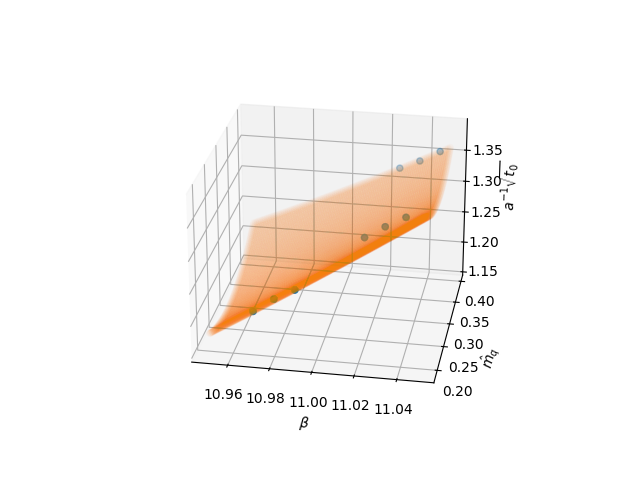

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter( x1, x2, yy )
# zuplims=yy+dyy
# zlolims=yy-dyy
# estep = 1
# ax.errorbar( x1, x2, yy, 0.01, zuplims=zuplims, zlolims=zlolims, errorevery=estep, ls='none')

# ax.scatter( x1, x2, fit_yy )

xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
fit_yy = fitter( np.array([xx1,xx2]).T, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

ax.view_init(elev=25, azim=-80, roll=0)

ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\hat{m}_q$")
ax.set_zlabel("$a^{-1}\\sqrt{t_0}$")

plt.savefig("./data/ainv.pdf", bbox_inches='tight')

In [20]:
np.savetxt( "./data/coeffs_ainv_beta_mqhat.dat", opt_ainv_beta_mqhat[0])

In [33]:
beta_m_MBs_ = []

for i in range(9):
    beta, mq, MBhat, dMBhat = beta_m_MBhats[9:][i]
    beta_,mq_,t0hat, dt0hat = beta_m_t0hats[3:][i]

    assert abs(beta-beta_)<1.0e-14
    assert abs(mq-mq_)<1.0e-14

    MB = MBhat * np.sqrt(t0hat)
    dMB = np.sqrt( dMBhat**2 * t0hat + (0.5*MBhat*dt0hat)**2/t0hat )

    beta_m_MBs_.append( [beta, mq, MB, dMB] )

beta_m_MBs = np.array( beta_m_MBs_ )

In [35]:
# MB as a func of beta and mqhat

x1 = beta_m_MBs.T[0]
x2 = beta_m_MBs.T[1]

xx = np.array([x1, x2]).T
yy = beta_m_MBs.T[2]
dyy = beta_m_MBs.T[3]

opt_MB_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
fit_yy = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

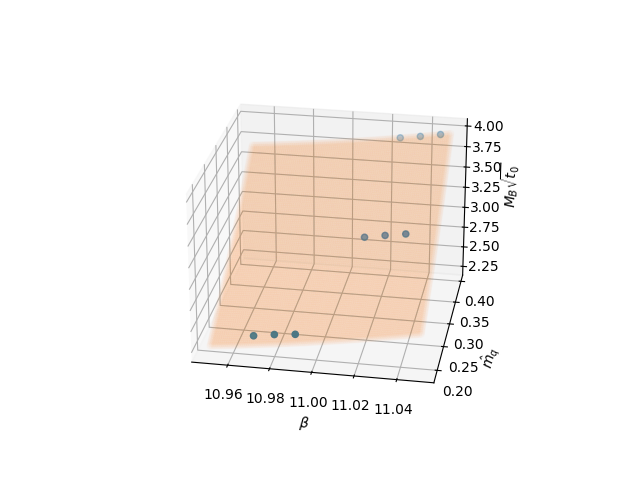

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter( x1, x2, yy )
# ax.scatter( x1, x2, fit_yy )

xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
fit_yy = fitter( np.array([xx1,xx2]).T, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )
ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

ax.view_init(elev=25, azim=-80, roll=0)

ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\hat{m}_q$")
ax.set_zlabel("$M_B\\sqrt{t_0}$")

plt.savefig("MB.pdf", bbox_inches='tight')

In [19]:
# get ainv for the finite temperature data points

In [20]:
x1 = betas_02 # betas
x2 = np.full( x1.shape[0], 0.2 ) # mqhat
xx = np.array([x1, x2]).T

ainvs_02 = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [21]:
x1 = betas_03 # betas
x2 = np.full( x1.shape[0], 0.3 ) # mqhat
xx = np.array([x1, x2]).T

ainvs_03 = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [22]:
x1 = betas_04 # betas
x2 = np.full( x1.shape[0], 0.4 ) # mqhat
xx = np.array([x1, x2]).T

ainvs_04 = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [23]:
# temperature

In [24]:
Ts_02 = ainvs_02/Nt
Ts_03 = ainvs_03/Nt
Ts_04 = ainvs_04/Nt

In [25]:
# get MB for the finite temperature data points

In [26]:
x1 = betas_02 # betas
x2 = np.full( x1.shape[0], 0.2 ) # mqhat
xx = np.array([x1, x2]).T

MBs_02 = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [27]:
x1 = betas_03 # betas
x2 = np.full( x1.shape[0], 0.3 ) # mqhat
xx = np.array([x1, x2]).T

MBs_03 = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [28]:
x1 = betas_04 # betas
x2 = np.full( x1.shape[0], 0.4 ) # mqhat
xx = np.array([x1, x2]).T

MBs_04 = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [29]:
T_MB_02 = np.array( [Ts_02, MBs_02] ).T
T_MB_03 = np.array( [Ts_03, MBs_03] ).T
T_MB_04 = np.array( [Ts_04, MBs_04] ).T

In [30]:
# get Tc as a function of MB

In [31]:
# Tc_02 = T_MB_02[ int(betac_ibetac_02[1]) ]
# Tc_03 = T_MB_03[ int(betac_ibetac_03[1]) ]
# Tc_04 = T_MB_04[ int(betac_ibetac_04[1]) ]
# Tc_MB = np.array([Tc_02, Tc_03, Tc_04])

In [32]:
# Tc_MB

In [33]:
# opt_Tc_MB = sp.optimize.curve_fit( linear, Tc_MB.T[1], Tc_MB.T[0] )

In [34]:
# plt.clf()
# plt.plot( Tc_MB.T[1], Tc_MB.T[0], marker='o' )
# yy_fit = linear( Tc_MB.T[1], opt_Tc_MB[0][0], opt_Tc_MB[0][1] )
# plt.plot( Tc_MB.T[1], yy_fit, marker='x' )

# plt.xlabel("$M_B$")
# plt.ylabel("$T_c$")
# plt.show()

In [35]:
# Get DVPrime as a func of T and MB @@ linearized around Tc

In [36]:
T_MB_DVPrimes_ = []
for ibeta in SclPrime_02.T[0].astype(int):
    DVPrime = (minima_02.T[3] - minima_02.T[2])[ibeta]
    T, MB = T_MB_02[ibeta]
    T_MB_DVPrimes_.append([T, MB, DVPrime])
T_MV_DVPrimes_02 = np.array(T_MB_DVPrimes_)

In [37]:
T_MB_DVPrimes_ = []
for ibeta in SclPrime_03.T[0].astype(int):
    DVPrime = (minima_03.T[3] - minima_03.T[2])[ibeta]
    T, MB = T_MB_03[ibeta]
    T_MB_DVPrimes_.append([T, MB, DVPrime])
T_MV_DVPrimes_03 = np.array(T_MB_DVPrimes_)

In [38]:
T_MB_DVPrimes_ = []
for ibeta in SclPrime_04.T[0].astype(int):
    DVPrime = (minima_04.T[3] - minima_04.T[2])[ibeta]
    T, MB = T_MB_04[ibeta]
    T_MB_DVPrimes_.append([T, MB, DVPrime])
T_MV_DVPrimes_04 = np.array(T_MB_DVPrimes_)

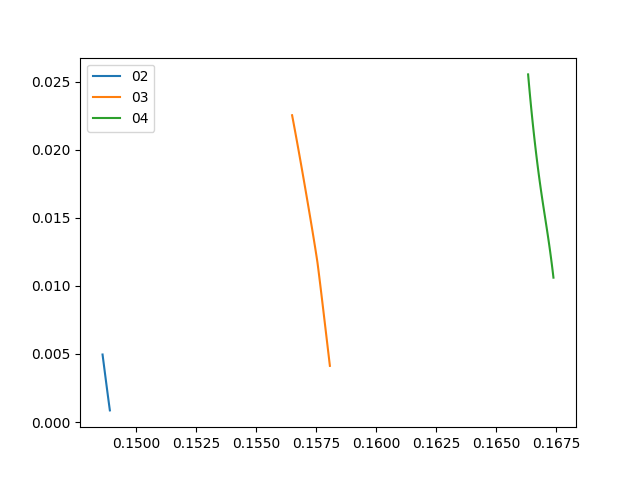

In [39]:
plt.clf()
plt.plot( T_MV_DVPrimes_02.T[0], T_MV_DVPrimes_02.T[2], label='02' )
plt.plot( T_MV_DVPrimes_03.T[0], T_MV_DVPrimes_03.T[2], label='03' )
plt.plot( T_MV_DVPrimes_04.T[0], T_MV_DVPrimes_04.T[2], label='04' )
plt.legend()
plt.show()

In [40]:
T_MV_DVPrimes_04.shape

(108, 3)

In [41]:
# lin
fitm02 = 0
fitm03 = 85
fitm04 = 98

# # quad
# fitm03 = 70
# fitm04 = 60

In [42]:
# plt.plot( T_MV_DVPrimes_02.T[0][fitm02:], T_MV_DVPrimes_02.T[2][fitm02:], label='02' )
# plt.plot( T_MV_DVPrimes_03.T[0][fitm03:], T_MV_DVPrimes_03.T[2][fitm03:], label='03' )
# plt.plot( T_MV_DVPrimes_04.T[0][fitm04:], T_MV_DVPrimes_04.T[2][fitm04:], label='04' )
# plt.legend()

In [43]:
T_con = np.concatenate( (T_MV_DVPrimes_02.T[0][fitm02:], 
                            T_MV_DVPrimes_03.T[0][fitm03:], T_MV_DVPrimes_04.T[0][fitm04:]))
MB_con = np.concatenate( (T_MV_DVPrimes_02.T[1][fitm02:], 
                          T_MV_DVPrimes_03.T[1][fitm03:], T_MV_DVPrimes_04.T[1][fitm04:]))
DVPrime_con = np.concatenate( (T_MV_DVPrimes_02.T[2][fitm02:], 
                           T_MV_DVPrimes_03.T[2][fitm03:], T_MV_DVPrimes_04.T[2][fitm04:]))

In [1]:
def Tc_MB_fitter( MB, Mc, b0, b1, gam1 ):
    return b0+b1*(MB-Mc)**gam1

In [45]:
# def Tc_MB_fitter( MB_, Mc_, b0, b1 ):
#     return b0 + b1*(MB_-Mc_) # + b2*(MB_-Mc_)**2

In [46]:
def DVPrime_fitter(T_MB, Mc, a0, b0, b1, gam0, gam1):
    T = T_MB[0]
    MB = T_MB[1]
    # return ( a0*(MB-Mc) ) *(T - (b0+b1*(MB-Mc) )) # + ( c0 + c1*MB )*T**2
    return ( a0*(MB-Mc)**gam0 ) *(T - Tc_MB_fitter( MB, Mc, b0, b1, gam1 ) ) # + ( c0 + c1*MB )*T**2

In [47]:
# def DVPrime_fitter(T_MB, Mc_, a0, b0, b1, gam0):
#     T = T_MB[0]
#     MB_ = T_MB[1]
#     # return ( a0*(MB-Mc) ) *(T - (b0+b1*(MB-Mc) )) # + ( c0 + c1*MB )*T**2
#     return ( a0*(MB_-Mc_)**gam0 ) *(T - Tc_MB_fitter( MB_, Mc_, b0, b1 ) ) # + ( c0 + c1*MB )*T**2

In [48]:
# def DVPrime_fitter(T_MB, Mc, c1, gamma):
#     T = T_MB[0]
#     MB = T_MB[1]
#     return c1*(MB-Mc)**gamma * T

In [49]:
opt_DVPrime_T_MB = sp.optimize.curve_fit( DVPrime_fitter, [T_con, MB_con], DVPrime_con,
                                       p0=[ 2.01669533e+00, -1.71223422e+01,  1.45744805e-01,  1.16275831e-02, 1.0, 1.0 ]
                                       )
opt_DVPrime_T_MB

(array([ 2.28140302e+00, -1.81614817e+01,  1.48380970e-01,  1.21481729e-02,
         3.98644522e-02,  9.84768079e-01]),
 array([[ 3.91318828e-03,  1.35410988e-03,  4.94944077e-05,
         -2.64867159e-06, -1.25789492e-03,  1.81184974e-04],
        [ 1.35410988e-03,  1.04374690e-03,  1.71234365e-05,
         -8.97572135e-07, -4.48710538e-04,  6.22871020e-05],
        [ 4.94944077e-05,  1.71234365e-05,  6.26010778e-07,
         -3.35011943e-08, -1.59093862e-05,  2.29166153e-06],
        [-2.64867159e-06, -8.97572135e-07, -3.35011943e-08,
          1.79383973e-09,  8.50453285e-07, -1.22665228e-07],
        [-1.25789492e-03, -4.48710538e-04, -1.59093862e-05,
          8.50453285e-07,  4.05507759e-04, -5.82246947e-05],
        [ 1.81184974e-04,  6.22871020e-05,  2.29166153e-06,
         -1.22665228e-07, -5.82246947e-05,  8.39120007e-06]]))

In [50]:
# opt_DVPrime_T_MB = sp.optimize.curve_fit( DVPrime_fitter, [T_con, MB_con], DVPrime_con,
#                                        p0=[ 2.01669533e+00, -1.71223422e+01,  1.45744805e-01,  1.16275831e-02, 1.0 ]
#                                        )
# opt_DVPrime_T_MB

In [51]:
# opt_DVPrime_T_MB = sp.optimize.curve_fit( DVPrime_fitter, [T_con, MB_con], DVPrime_con,
#                                        p0=[ 2.32044376e+00, -1.80407870e+01,  1.48879180e-01,  1.22677786e-02,
#         -1.39642133e-04,  1.99489922e-02 ]
#                                        )
# opt_DVPrime_T_MB

In [52]:
Mc = opt_DVPrime_T_MB[0][0]
Mc

2.281403023398023

In [53]:
MB_con

array([2.32296835, 2.32313293, 2.32329758, 2.32346229, 2.32362708,
       2.32379193, 2.32395684, 2.32412183, 2.32428688, 2.324452  ,
       2.32461719, 2.32478244, 2.32494776, 2.32511315, 2.32527861,
       2.32544413, 2.32560972, 2.32577538, 2.3259411 , 2.3261069 ,
       2.32627276, 2.32643868, 2.32660468, 2.32677074, 3.08777865,
       3.0879687 , 3.08815881, 3.08834899, 3.08853924, 3.08872955,
       3.08891994, 3.08911039, 3.0893009 , 3.08949149, 3.08968214,
       3.08987286, 3.09006364, 3.0902545 , 3.09044542, 3.09063641,
       3.09082746, 3.09101859, 3.09120978, 3.09140103, 3.09159236,
       3.09178375, 3.09197521, 3.09216674, 3.09235833, 3.09254999,
       3.09274172, 3.09293352, 3.09312538, 3.09331731, 3.09350931,
       3.09370137, 3.09389351, 3.09408571, 3.09427797, 3.09447031,
       3.09466271, 3.09485518, 3.09504772, 3.09524032, 3.09543299,
       3.09562573, 3.90331187, 3.90349211, 3.90367241, 3.90385278,
       3.90403321, 3.90421372, 3.90439429, 3.90457493, 3.90475

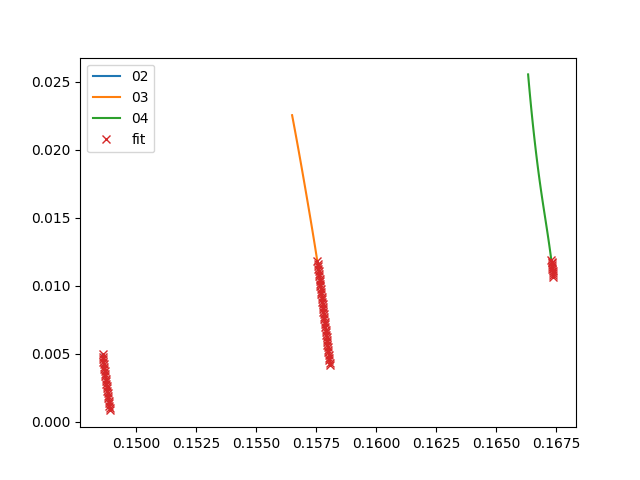

In [54]:
plt.clf()
plt.plot( T_MV_DVPrimes_02.T[0], T_MV_DVPrimes_02.T[2], label='02' )
plt.plot( T_MV_DVPrimes_03.T[0], T_MV_DVPrimes_03.T[2], label='03' )
plt.plot( T_MV_DVPrimes_04.T[0], T_MV_DVPrimes_04.T[2], label='04' )

xx2 = [T_con, MB_con]
yy_fit2 = DVPrime_fitter( xx2,
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )

plt.plot( xx2[0], yy_fit2, label='fit', marker='x', ls='none' )
plt.legend()
plt.show()

In [55]:
def Tc_(MB_):
    return Tc_MB_fitter( MB_, opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], opt_DVPrime_T_MB[0][5] )

In [56]:
TmTc_MB_DVPrimes_ = []
for ibeta in SclPrime_02.T[0].astype(int):
    DVPrime = (minima_02.T[3] - minima_02.T[2])[ibeta]
    T, MB = T_MB_02[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_DVPrimes_.append([T-Tc, MB, DVPrime])
TmTc_MV_DVPrimes_02 = np.array(TmTc_MB_DVPrimes_)

In [57]:
TmTc_MB_DVPrimes_ = []
for ibeta in SclPrime_03.T[0].astype(int):
    DVPrime = (minima_03.T[3] - minima_03.T[2])[ibeta]
    T, MB = T_MB_03[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_DVPrimes_.append([T-Tc, MB, DVPrime])
TmTc_MV_DVPrimes_03 = np.array(TmTc_MB_DVPrimes_)

In [58]:
TmTc_MB_DVPrimes_ = []
for ibeta in SclPrime_04.T[0].astype(int):
    DVPrime = (minima_04.T[3] - minima_04.T[2])[ibeta]
    T, MB = T_MB_04[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_DVPrimes_.append([T-Tc, MB, DVPrime])
TmTc_MV_DVPrimes_04 = np.array(TmTc_MB_DVPrimes_)

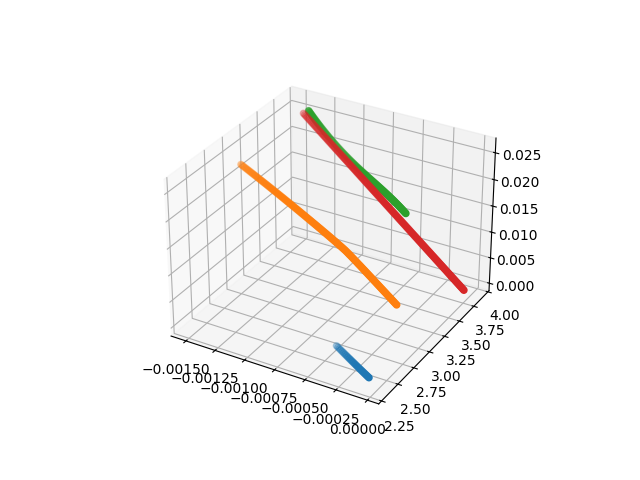

In [59]:
plt.clf()
ax = plt.axes(projection='3d')
ax.scatter( TmTc_MV_DVPrimes_02.T[0], TmTc_MV_DVPrimes_02.T[1], TmTc_MV_DVPrimes_02.T[2] )
ax.scatter( TmTc_MV_DVPrimes_03.T[0], TmTc_MV_DVPrimes_03.T[1], TmTc_MV_DVPrimes_03.T[2] )
ax.scatter( TmTc_MV_DVPrimes_04.T[0], TmTc_MV_DVPrimes_04.T[1], TmTc_MV_DVPrimes_04.T[2] )

# xx21, xx22 = TmTc_con, MB_con
xx21=np.arange(-0.0014, -0.00001, 0.00001)
xx22=np.full(xx21.shape[0], 3.8)
xx2=np.array([xx21+Tc_(xx22), xx22])
# xx2 = [TmTc_con, MB_con]
yy_fit2 = DVPrime_fitter( xx2,
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
ax.scatter( xx21, xx22, yy_fit2 )
plt.show()

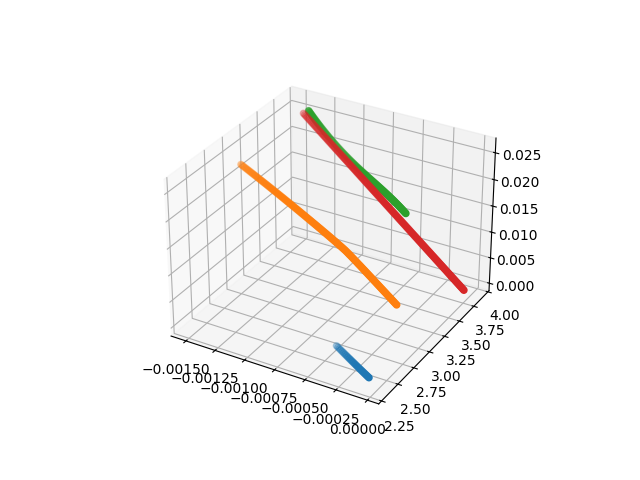

In [60]:
plt.clf()
ax = plt.axes(projection='3d')
ax.scatter( TmTc_MV_DVPrimes_02.T[0], TmTc_MV_DVPrimes_02.T[1], TmTc_MV_DVPrimes_02.T[2] )
ax.scatter( TmTc_MV_DVPrimes_03.T[0], TmTc_MV_DVPrimes_03.T[1], TmTc_MV_DVPrimes_03.T[2] )
ax.scatter( TmTc_MV_DVPrimes_04.T[0], TmTc_MV_DVPrimes_04.T[1], TmTc_MV_DVPrimes_04.T[2] )

# xx21, xx22 = TmTc_con, MB_con
xx21=np.arange(-0.0014, -0.00001, 0.00001)
xx22=np.full(xx21.shape[0], 3.8)
xx2=np.array([xx21+Tc_(xx22), xx22])
# xx2 = [TmTc_con, MB_con]
yy_fit2 = DVPrime_fitter( xx2,
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
ax.scatter( xx21, xx22, yy_fit2 )
plt.show()

/tmp/ipykernel_22109/1470169282.py:2: RuntimeWarning: invalid value encountered in power
  return b0+b1*(MB-Mc)**gam1
/tmp/ipykernel_22109/3660795692.py:5: RuntimeWarning: invalid value encountered in power
  return ( a0*(MB-Mc)**gam0 ) *(T - Tc_MB_fitter( MB, Mc, b0, b1, gam1 ) ) # + ( c0 + c1*MB )*T**2


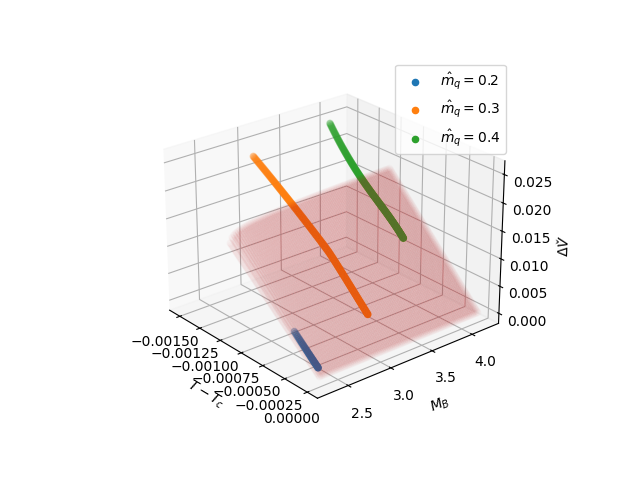

In [61]:
plt.clf()
ax = plt.axes(projection='3d')

ax.scatter( TmTc_MV_DVPrimes_02.T[0], TmTc_MV_DVPrimes_02.T[1], TmTc_MV_DVPrimes_02.T[2], label='$\\hat{m}_q=0.2$' )
ax.scatter( TmTc_MV_DVPrimes_03.T[0], TmTc_MV_DVPrimes_03.T[1], TmTc_MV_DVPrimes_03.T[2], label='$\\hat{m}_q=0.3$' )
ax.scatter( TmTc_MV_DVPrimes_04.T[0], TmTc_MV_DVPrimes_04.T[1], TmTc_MV_DVPrimes_04.T[2], label='$\\hat{m}_q=0.4$' )

xx1 = np.repeat(np.linspace(-0.001, 0.0, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(2.0, 4.2, 100), 100).reshape(100,100).T
yy_fit2 = DVPrime_fitter( [xx1+Tc_(xx2),xx2],
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
ax.scatter( xx1, xx2, yy_fit2, alpha=0.02 )

ax.view_init(elev=25, azim=-40, roll=0)

ax.set_xlabel("$T-T_c$")
ax.set_ylabel("$M_B$")
ax.set_zlabel("$\\Delta {V}\\check$")

plt.legend()

plt.savefig("DeltaV.pdf", bbox_inches='tight')
plt.show()

In [62]:
# Get SclPrime as a func of TmTc and MB @@@ but only around MBs for mq=0.3, 0.4

In [63]:
TmTc_MB_SclPrime_02_=[]
for row in SclPrime_02:
    ibeta = int(row[0])
    SclPrime = row[2]
    T, MB = T_MB_02[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_SclPrime_02_.append( [T-Tc, MB, SclPrime] )
TmTc_MB_SclPrime_02 = np.array( TmTc_MB_SclPrime_02_ )

In [64]:
TmTc_MB_SclPrime_03_=[]
for row in SclPrime_03:
    ibeta = int(row[0])
    SclPrime = row[2]
    T, MB = T_MB_03[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_SclPrime_03_.append( [T-Tc, MB, SclPrime] )
TmTc_MB_SclPrime_03 = np.array( TmTc_MB_SclPrime_03_ )

In [65]:
TmTc_MB_SclPrime_04_=[]
for row in SclPrime_04:
    ibeta = int(row[0])
    SclPrime = row[2]
    T, MB = T_MB_04[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_SclPrime_04_.append( [T-Tc, MB, SclPrime] )
TmTc_MB_SclPrime_04 = np.array( TmTc_MB_SclPrime_04_ )

In [66]:
# lin
fitm02 = 16
fitm03 = 105
fitm04 = 70

In [67]:
TmTc_con = np.concatenate( (TmTc_MB_SclPrime_02[fitm02:].T[0], 
                            TmTc_MB_SclPrime_03[fitm03:].T[0], TmTc_MB_SclPrime_04[fitm04:].T[0]))
MB_con = np.concatenate( (TmTc_MB_SclPrime_02[fitm02:].T[1], 
                          TmTc_MB_SclPrime_03[fitm03:].T[1], TmTc_MB_SclPrime_04[fitm04:].T[1]))
SclPrime_con = np.concatenate( (TmTc_MB_SclPrime_02[fitm02:].T[2], 
                           TmTc_MB_SclPrime_03[fitm03:].T[2], TmTc_MB_SclPrime_04[fitm04:].T[2]))

In [68]:
# def SclPrime_fitter(TmTc_MB, a0, a1, b0, b1, c0, c1):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a1*(MB-Mc) + (b1*(MB-Mc))/TmTc + (c1*(MB-Mc))/TmTc**2

In [69]:
# def SclPrime_fitter(TmTc_MB, a0, a1, b1, c1, gam1, gam2):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a0 + a1*MB + (b1*(MB-Mc)**gam1)/TmTc + (c1*(MB-Mc)**gam2)/TmTc**2

In [70]:
# def SclPrime_fitter(TmTc_MB, b1, c1, gam1, gam2):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (b1*(MB-Mc)**gam1 )/TmTc + (c1*(MB-Mc)**gam2 )/TmTc**2

In [71]:
# def SclPrime_fitter(TmTc_MB, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return c1*(MB-Mc)**gam/TmTc + c2*(MB-Mc)**(2.*gam)/TmTc**2 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )

In [72]:
# def SclPrime_fitter(TmTc_MB, a1, b1, c1):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a1*(MB-Mc) + (b1*(MB-Mc))/TmTc + (c1*(MB-Mc))/TmTc**2

In [73]:
def SclPrime_fitter(TmTc_MB, b, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return c1*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc + c2*(MB-Mc)**(2.*gam) * (1.0 + b/(MB-Mc) )**2/TmTc**2 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )

In [74]:
opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
                                       p0=[0.0, 0.002, 5.09222531e-06, 1.4]
                                       )
opt_SclPrime_TmTc_MB

(array([-7.87485227e-02,  2.39278238e-03,  6.43019840e-06,  1.34726756e+00]),
 array([[ 9.15102131e-06,  1.09317863e-08, -1.19826816e-10,
          9.09995079e-06],
        [ 1.09317863e-08,  4.72681493e-09,  1.78445407e-12,
         -1.99051750e-08],
        [-1.19826816e-10,  1.78445407e-12,  2.39198364e-15,
         -1.36729174e-10],
        [ 9.09995079e-06, -1.99051750e-08, -1.36729174e-10,
          1.05221182e-05]]))

In [75]:
# opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
#                                        p0=[0.002, 5.09222531e-06, 1.4]
#                                        )
# opt_SclPrime_TmTc_MB

In [76]:
# opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
#                                        p0=[0.0, 0.0, 2.09222531e-03, 5.36713214e-06, 2.19688902e+00, 2.97046528e+00]
#                                        )
# opt_SclPrime_TmTc_MB

In [77]:
# opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
#                                        p0=[2.09222531e-03, 5.36713214e-06, 0.0, 2.19688902e+00, 2.97046528e+00]
#                                        )
# opt_SclPrime_TmTc_MB

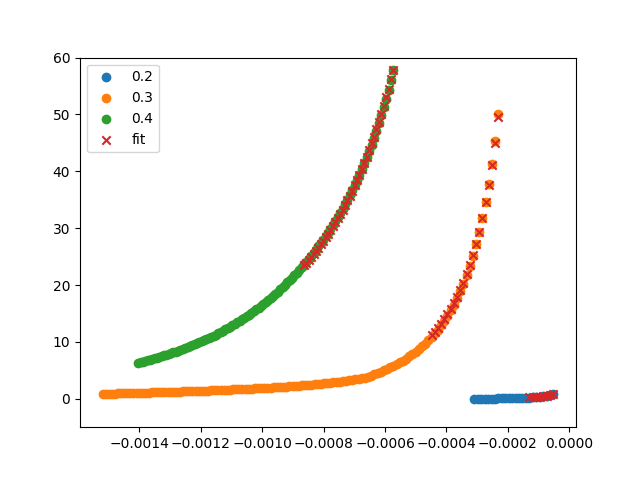

In [78]:
fig = plt.figure()
# ax = plt.axes(projection='3d')
plt.scatter( TmTc_MB_SclPrime_02.T[0], TmTc_MB_SclPrime_02.T[2], label="0.2" )
plt.scatter( TmTc_MB_SclPrime_03.T[0], TmTc_MB_SclPrime_03.T[2], label="0.3" )
plt.scatter( TmTc_MB_SclPrime_04.T[0], TmTc_MB_SclPrime_04.T[2], label="0.4" )

xx21, xx22 = TmTc_con, MB_con
# xx21=np.arange(-0.0014, -0.00001, 0.00001)
# xx22=np.full(xx21.shape[0], 2.4)
xx2=np.array([xx21, xx22])
yy_fit2 = SclPrime_fitter( xx2,
                opt_SclPrime_TmTc_MB[0][0], 
                          opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3], 
                          # opt_SclPrime_TmTc_MB[0][4],
                          # opt_SclPrime_TmTc_MB[0][4], opt_SclPrime_TmTc_MB[0][5], 
               )
plt.scatter( xx21, yy_fit2, marker='x', label="fit" )

plt.ylim(-5, 60)
# ax.set_zlim(0,50)
# ax.set_zlim(0,1)
# plt.savefig("global_fit.pdf")
plt.legend()
plt.show()

In [79]:
Mc

2.281403023398023

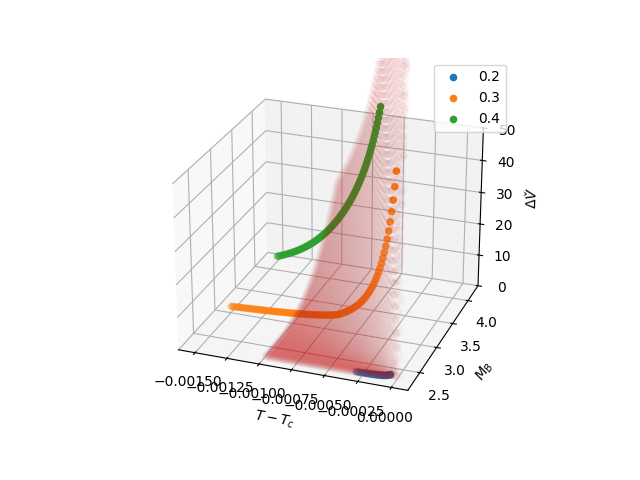

In [80]:
plt.clf()
ax = plt.axes(projection='3d')


ax.scatter( TmTc_MB_SclPrime_02.T[0], TmTc_MB_SclPrime_02.T[1], TmTc_MB_SclPrime_02.T[2], label="0.2" )
ax.scatter( TmTc_MB_SclPrime_03.T[0], TmTc_MB_SclPrime_03.T[1], TmTc_MB_SclPrime_03.T[2], label="0.3" )
ax.scatter( TmTc_MB_SclPrime_04.T[0], TmTc_MB_SclPrime_04.T[1], TmTc_MB_SclPrime_04.T[2], label="0.4" )

xx1 = np.repeat(np.linspace(-0.001, 0.00001, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(2.3, 4.2, 100), 100).reshape(100,100).T
yy_fit2 = SclPrime_fitter( [xx1,xx2],
                opt_SclPrime_TmTc_MB[0][0], opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3],
                          # opt_SclPrime_TmTc_MB[0][4], # opt_SclPrime_TmTc_MB[0][5], 
               )
ax.scatter( xx1, xx2, yy_fit2, alpha=0.02 )

ax.set_zlim( 0.0, 50.0 )

ax.view_init(elev=25, azim=-70, roll=0)

ax.set_xlabel("$T-T_c$")
ax.set_ylabel("$M_B$")
ax.set_zlabel("$\\Delta {V}\\check$")

plt.legend()

plt.savefig("scl.pdf", bbox_inches='tight')
plt.show()

In [81]:
def GamPrime( T_, Tc_, MB_ ):
    SclPrime = SclPrime_fitter( [T_-Tc_, MB_] ,
                opt_SclPrime_TmTc_MB[0][0], opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3],
                               # opt_SclPrime_TmTc_MB[0][4], # opt_SclPrime_TmTc_MB[0][5], 
               )
    coeff = (SclPrime/(2.0*np.pi))**(3.0/2.0)
    efactor = np.exp( -SclPrime )
    return coeff * efactor

# Get Tstar

In [82]:
finalres_=[]

In [83]:
beta_m_alat_MB

array([[10.97      ,  0.2       ,  0.83942644,  2.32456955],
       [10.98      ,  0.2       ,  0.82200216,  2.37283572],
       [10.99      ,  0.2       ,  0.80922562,  2.39415254],
       [11.015     ,  0.3       ,  0.79735623,  3.0709411 ],
       [11.025     ,  0.3       ,  0.78194669,  3.12978271],
       [11.035     ,  0.3       ,  0.77085535,  3.15608676],
       [11.025     ,  0.4       ,  0.75956475,  3.85597271],
       [11.035     ,  0.4       ,  0.75211606,  3.88171617],
       [11.045     ,  0.4       ,  0.7424147 ,  3.92293048]])

In [84]:
# MBGeV = 2.0
# MBGeV = 10.0
# MBGeV = 50.0
# MBGeV = 100.0
MBGeV = 500.0

In [85]:
finalres_

[]

In [86]:
# MB = 2.55
# MB = 2.9
# MB = 3.25
# MB = 3.6
MB = 3.95

sqrt_t0_inv_GeV = MBGeV/MB # GeV; free parameter

In [1122]:
MP = MP_GeV / sqrt_t0_inv_GeV
Tc = Tc_( MB )

In [1123]:
Tc

0.16849391116195758

In [1124]:
# no midpt

In [1125]:
NTs = 2000
DTc = 0.001 # from DVPrime
Ts = np.linspace(Tc-DTc, Tc, NTs, endpoint=False)
dT = Ts[1]-Ts[0]

# TsMidpt = Ts[:-1]+dT

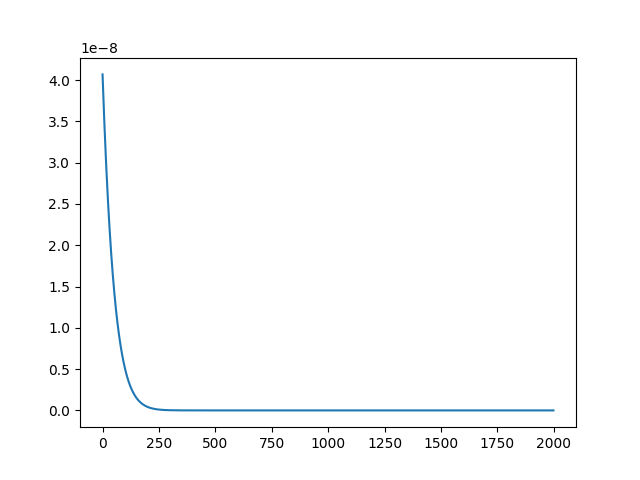

In [1126]:
plt.clf()
GamPrimes = GamPrime( Ts, Tc, MB )
plt.plot( GamPrimes )
plt.show()

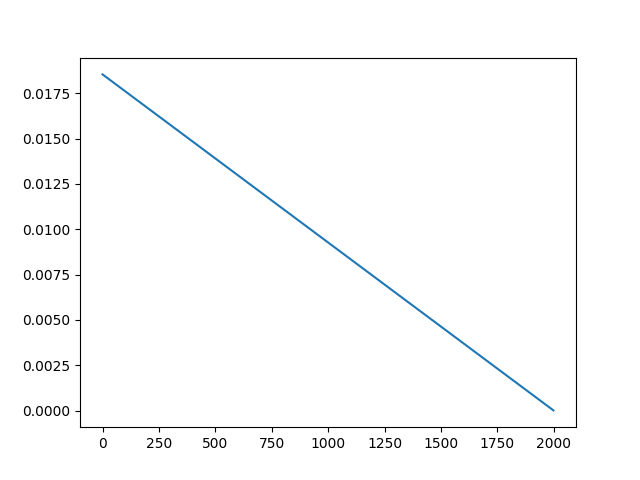

In [1127]:
plt.clf()
DVPrimes = DVPrime_fitter( [Ts, MB],
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
plt.plot( DVPrimes )
plt.show()

In [1128]:
norm = 1.0
tol=1.0e-12

# initial values
Is_tmp = np.full( NTs, 0.0 )
Ps_tmp = np.exp(Is_tmp)

counter=0
while norm>tol:
    print(counter)
    counter+=1

    Is_tmp_old = Is_tmp
    
    # Hsqs = Ts**4/(3.0*MP**2) * ( np.pi**2/30.0 * gstar + DVPrimes*Ps_tmp )
    Hsqs = Ts**4/(3.0*MP**2) * ( np.pi**2/30.0 * gstar )
    Hinv = Hsqs**(-0.5)
    
    T2TpDTInt_=[]
    for iT in np.arange(0,NTs):
        tmp = []
        for iDT in np.arange(0,NTs-iT):
            integrand = dT * Hinv[iT:iT+iDT]
            tmp.append( np.sum(integrand) )
        T2TpDTInt_.append(tmp)
    T2TpDTInt = T2TpDTInt_
    
    Is_ = []
    for iT in np.arange(0,NTs):
        integral = 0.0
        for iDT in np.arange(0,NTs-iT):
            Tprime = iT+iDT
            integral += dT*Hinv[Tprime] * GamPrimes[Tprime] * T2TpDTInt[iT][iDT]**3
        Is_.append(integral)
    Is_tmp = np.nan_to_num(np.array(Is_), nan=1.e10)
    
    Ps_tmp = np.exp(-Is_tmp)

    norm = np.sum( (Is_tmp_old - Is_tmp)**2 )

Ps = Ps_tmp
Is = Is_tmp

0
1


In [1129]:
Is

array([3.32275081e+46, 3.24019638e+46, 3.15958259e+46, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

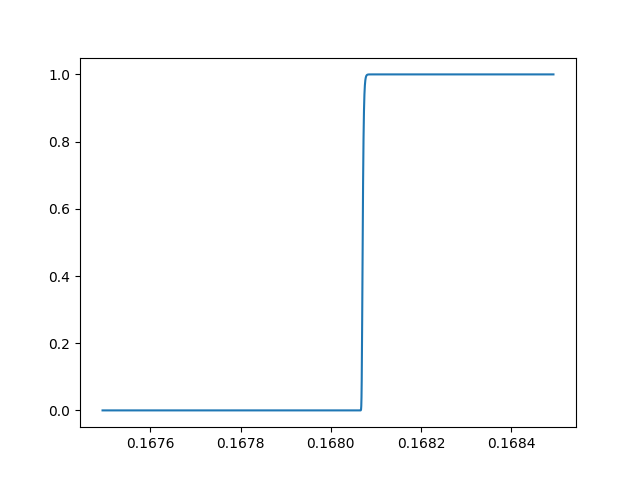

In [1130]:
plt.clf()
plt.plot( Ts, Ps )
plt.show()

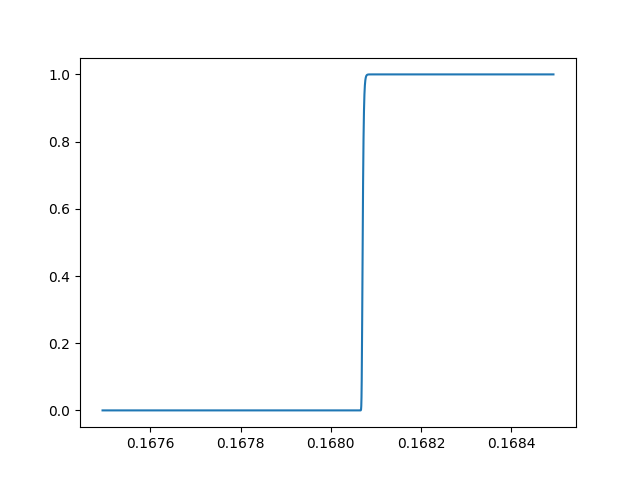

In [1131]:
plt.clf()
plt.plot( Ts, Ps )
plt.show()

In [1132]:
iTstar = np.argmin( (Is-0.34)**2 )
Tstar = Ts[iTstar]

Is[iTstar]

0.2891835020223498

In [1133]:
iTstar, Tstar

(1156, 0.16807191116195758)

In [1134]:
iTstar, Tstar

(1156, 0.16807191116195758)

# GW parameters

In [1135]:
# check numerical derivs

In [1136]:
def d_dT_DVPrime_fitter(T_MB, Mc, a0, b0, b1, gam0, gam1):
    MB = T_MB[1]
    return ( a0*(MB-Mc)**gam0 )

In [1137]:
def d_dT_SclPrime_fitter(TmTc_MB, b, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return -c1*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc**2 - 2.0* c2*(MB-Mc)**(2.*gam) * (1.0 + b/(MB-Mc) )**2/TmTc**3 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )

In [1138]:
beta_tilde = Tstar * d_dT_SclPrime_fitter( [Tstar-Tc, MB], 
                                     opt_SclPrime_TmTc_MB[0][0], opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3], # opt_SclPrime_TmTc_MB[0][4], # opt_SclPrime_TmTc_MB[0][5]
                                    )

In [1139]:
DVPrime = DVPrime_fitter( [Tstar, MB], opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                    opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5]
                       )

In [1140]:
dDVPrime_dT = d_dT_DVPrime_fitter( [Tstar, MB], opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                    opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5]
                       )

In [1141]:
dDVPrime_dT

-18.535964760074123

In [1142]:
beta_tilde

99453.0859879853

In [1143]:
numer = Tstar*dDVPrime_dT
denom = Tstar*dDVPrime_dT + 4.0*DVPrime
alpha = (1.0/3.0) * numer/denom

In [1144]:
alpha

0.33671507056223504

In [1145]:
vJ = ( np.sqrt(2.0*alpha/3.0 + alpha**2) + np.sqrt(1.0/3.0) ) / (1.0+alpha)
kappa_v = np.sqrt(alpha)/(0.135+np.sqrt(0.98+alpha))
Om_HSDM = gstar_HSDM / (gstar_HSDM+gstar_SM)

In [1146]:
alpha, kappa_v, vJ

(0.33671507056223504, 0.4524597797932252, 0.8667532659213864)

In [1147]:
Ubarfsq = 3.0/4.0 * alpha/(1.0+alpha) * kappa_v

In [1148]:
# 1.0 / np.sqrt( 1.0 + 2.0*(8.0*np.pi)**(1.0/3.0) * vJ / ( beta_tilde*np.sqrt(Ubarfsq) ) )

In [1149]:
tau_sw = 1 - 1.0 / np.sqrt( 1.0 + 2.0*(8.0*np.pi)**(1.0/3.0) * vJ / ( beta_tilde*np.sqrt(Ubarfsq) ) )

In [1150]:
kappa_sw = np.sqrt(tau_sw)*kappa_v

In [1151]:
fpeak = 1.9*1.0e-5 * (gstar/100.)**(1.0/6.0) * (Tstar*sqrt_t0_inv_GeV/100.) * (beta_tilde / vJ)
hsq_Omega_peak = 2.65*1.0e-6 * (vJ/beta_tilde) * (kappa_sw*alpha/(1.0+alpha)) * (100./gstar)**(1.0/3.0) * Om_HSDM**2

In [1152]:
sqrt_t0_inv_GeV, MB*sqrt_t0_inv_GeV, Tstar*sqrt_t0_inv_GeV, alpha, beta_tilde, fpeak, hsq_Omega_peak

(126.58227848101265,
 500.0,
 21.27492546353893,
 0.33671507056223504,
 99453.0859879853,
 0.4898351244217053,
 1.1729162626714974e-15)

In [1153]:
finalres_.append( [fpeak, hsq_Omega_peak, sqrt_t0_inv_GeV, MB, Tstar] )

In [1154]:
finalres_


[[0.04425755966510326,
  1.7916340603835222e-17,
  0.7843137254901962,
  2.55,
  0.1516842755822511],
 [0.011370253733937704,
  1.1833572942780997e-16,
  0.6896551724137931,
  2.9,
  0.1558551226458434],
 [0.005712742649716253,
  2.917650429757331e-16,
  0.6153846153846154,
  3.25,
  0.15997052379347848],
 [0.003562087140421397,
  5.288958248842866e-16,
  0.5555555555555556,
  3.6,
  0.16405032548610904],
 [0.005530962823898416,
  2.4696648562695e-16,
  0.5063291139240506,
  3.95,
  0.1681939111619576],
 [0.2027112019044908,
  2.0434914835469434e-17,
  3.9215686274509807,
  2.55,
  0.15168352558225107],
 [0.052976174035952166,
  1.3155786557671198e-16,
  3.4482758620689657,
  2.9,
  0.1558528726458434],
 [0.02665621409965075,
  3.2365229949875494e-16,
  3.076923076923077,
  3.25,
  0.15996632379347847],
 [0.016677630574595686,
  5.837283300977298e-16,
  2.7777777777777777,
  3.6,
  0.16404417548610906],
 [0.02765481411949208,
  2.4696648562695e-16,
  2.531645569620253,
  3.95,
  0.1681

# comparison

In [1155]:
finalres_

[[0.04425755966510326,
  1.7916340603835222e-17,
  0.7843137254901962,
  2.55,
  0.1516842755822511],
 [0.011370253733937704,
  1.1833572942780997e-16,
  0.6896551724137931,
  2.9,
  0.1558551226458434],
 [0.005712742649716253,
  2.917650429757331e-16,
  0.6153846153846154,
  3.25,
  0.15997052379347848],
 [0.003562087140421397,
  5.288958248842866e-16,
  0.5555555555555556,
  3.6,
  0.16405032548610904],
 [0.005530962823898416,
  2.4696648562695e-16,
  0.5063291139240506,
  3.95,
  0.1681939111619576],
 [0.2027112019044908,
  2.0434914835469434e-17,
  3.9215686274509807,
  2.55,
  0.15168352558225107],
 [0.052976174035952166,
  1.3155786557671198e-16,
  3.4482758620689657,
  2.9,
  0.1558528726458434],
 [0.02665621409965075,
  3.2365229949875494e-16,
  3.076923076923077,
  3.25,
  0.15996632379347847],
 [0.016677630574595686,
  5.837283300977298e-16,
  2.7777777777777777,
  3.6,
  0.16404417548610906],
 [0.02765481411949208,
  2.4696648562695e-16,
  2.531645569620253,
  3.95,
  0.1681

In [1156]:
res = np.array(finalres_)

In [1157]:
dat = np.loadtxt("peak-integrated_sensitivities/pis_s.dat")
LISA = np.loadtxt("power-law-integrated_sensitivities/plis_LISA.dat")
BBO = np.loadtxt("power-law-integrated_sensitivities/plis_BBO.dat")
DECIGO = np.loadtxt("power-law-integrated_sensitivities/plis_DECIGO.dat")

HLVO2 = np.loadtxt("power-law-integrated_sensitivities/plis_HLVO2.dat")

In [1158]:
# plt.clf()

# fig = plt.figure()
# ax = plt.axes()

# # d=np.zeros(len(dat))+1.0

# ax.fill_between( 10**dat.T[0], 10**dat.T[1], 1.0, label="LISA", alpha=0.2 )
# ax.fill_between( 10**dat.T[0], 10**dat.T[2], 1.0, label="DECIGO", alpha=0.2 )
# ax.fill_between( 10**dat.T[0], 10**dat.T[3], 1.0, label="BBO", alpha=0.2 )

# plt.scatter( res.T[0], res.T[1] )

# plt.xscale("log")
# plt.yscale("log")

# plt.ylim(10**-18, 10**-10)
# plt.xlim(10**-4, 10)

# plt.legend()

# plt.title("peak-integrated sensitivity")
# plt.show()

In [1159]:
(res.T[2] * res.T[3]) [0]

2.0

In [1160]:
res.T[2] * res.T[4]

array([ 0.11896806,  0.10748629,  0.0984434 ,  0.09113907,  0.08516147,
        0.59483736,  0.5374237 ,  0.49220407,  0.45567827,  0.42580737,
        2.97417501,  2.68707711,  2.46095344,  2.27829758,  2.12903685,
        5.94833826,  5.37411802,  4.92184227,  4.55651182,  4.25523826,
       29.74155404, 26.8701677 , 24.60844212, 22.78155215, 21.27492546])

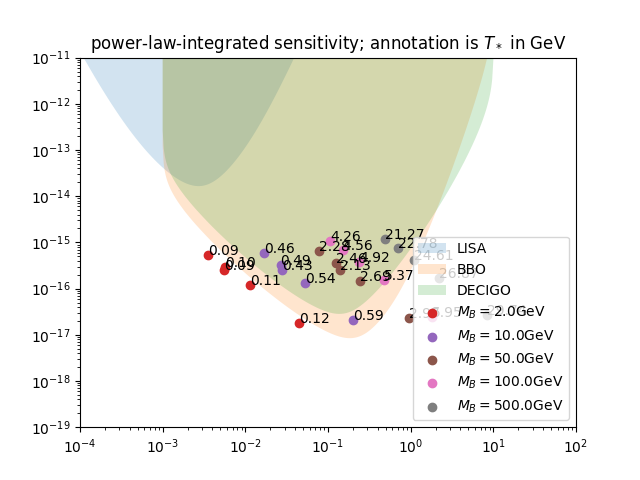

In [1162]:
plt.clf()

fig = plt.figure()
ax = plt.axes()

# d=np.zeros(len(dat))+1.0

ax.fill_between( 10**LISA.T[0], 10**LISA.T[1], 1.0, label="LISA", alpha=0.2 )
ax.fill_between( 10**BBO.T[0], 10**BBO.T[1], 1.0, label="BBO", alpha=0.2 )
ax.fill_between( 10**DECIGO.T[0], 10**DECIGO.T[1], 1.0, label="DECIGO", alpha=0.2 )
# ax.fill_between( 10**HLVO2.T[0], 10**HLVO2.T[1], 1.0, label="HLVO2", alpha=0.2 )

#######################################

rmin=0
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################

rmin=5
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################

rmin=10
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################

rmin=15
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################

rmin=20
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################


plt.xscale("log")
plt.yscale("log")

plt.ylim(10**-19, 10**-11)
plt.xlim(10**-4, 100)


plt.legend()

plt.title("power-law-integrated sensitivity; annotation is $T_*$ in GeV")

plt.savefig("sensitivity.pdf", bbox_inches='tight')
plt.show()

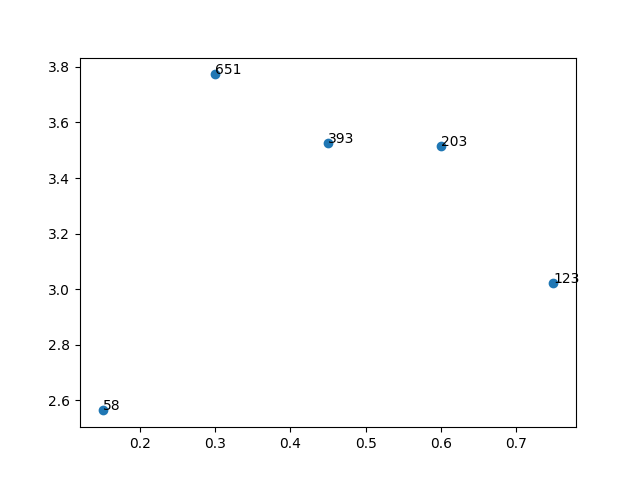

In [376]:
x = [0.15, 0.3, 0.45, 0.6, 0.75]
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))